### Micro-proyecto # 1
__Detección de paletas de color a partir de obras de arte.__

Autores: Andrés Vega, David Méndez Acuña

In [1]:
import pandas as pd
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

from sklearn.cluster import KMeans
#pip3 install scikit-learn-extra
from sklearn_extra.cluster  import KMedoids

import warnings
warnings.filterwarnings("ignore")

In [2]:
def load_image(path, print=False):
    '''
    Load an image from a given path. This function returns the pixels matrix, each cell of the matrix is a 
    3-dimensional array with the RGB components of the pixel.
    '''
    image_matrix = imageio.imread(path)

    columns = len(image_matrix)
    rows = len(image_matrix[0])
    data = []

    for i in range(columns):
        for j in range(rows):
            color = image_matrix[i][j]
            R, G, B = color[0], color[1], color[2]
            data.append([R, G, B])

    data_frame = pd.DataFrame(columns=['R', 'G', 'B'], data=data)

    if print :   
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), sharex=False, sharey=False)
        axes[0] = plt.axes(projection='3d')
        axes[0].set_anchor('W')
        axes[0].scatter3D(data_frame.loc[:,"R"], data_frame.loc[:,"G"], data_frame.loc[:,"B"], c=data_frame/255.0)
        axes[1].imshow(image_matrix)

        fig.tight_layout()

    return data_frame


In [3]:
def print_palette(colors) :
    '''
    Prints a palette with the colors in the parameter. 
    '''
    fig, ax = plt.subplots()
    ax.plot([0, 0],[0, 0])

    lenght = 1
    initial_position = 0
    for i in range(len(colors)):
        color=[colors[i][0]/255.0, colors[i][1]/255.0, colors[i][2]/255.0]
        ax.add_patch(Rectangle((initial_position, 0), lenght, 6, color=color))
        initial_position += lenght

    plt.axis('off')
    plt.show()

In [4]:
def run_clustering(path):
    '''
    Runs the clustering algorithm and detects the palette from the image in the path in
    the parameter. 
    '''
    image_df = load_image(path=path, print=True)
    mejor_modelo = KMeans(n_clusters=6, random_state=0)
    mejor_modelo.fit(image_df)
    print_palette(mejor_modelo.cluster_centers_)

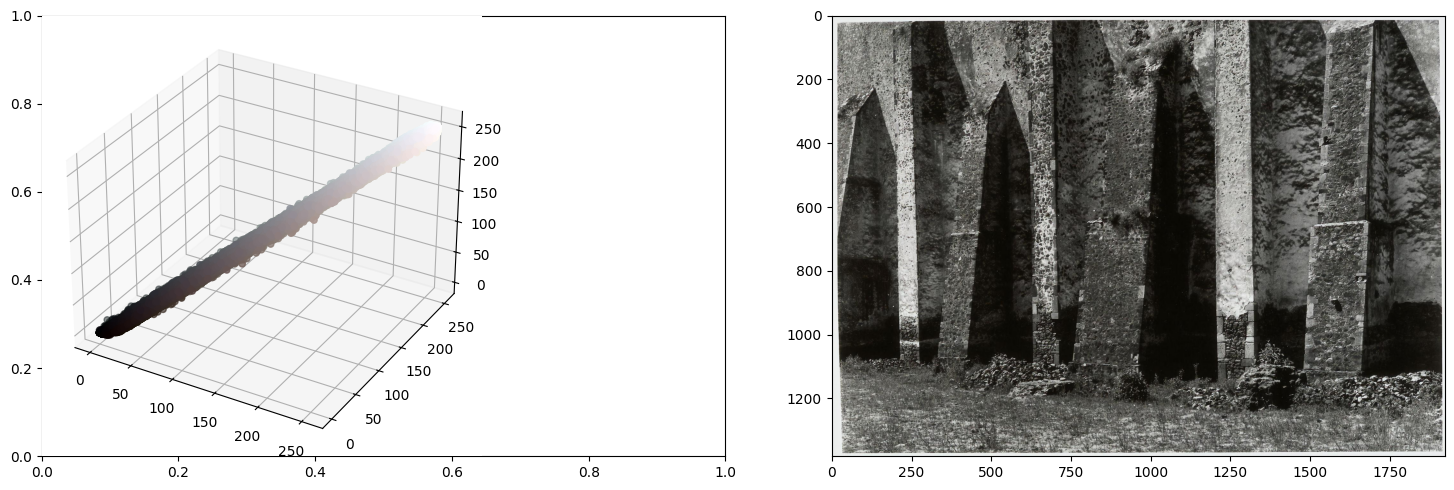

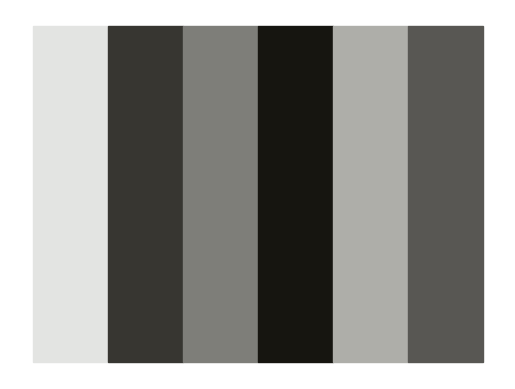

In [6]:
run_clustering(path='images/aaron-siskind_acolman-1-1955.jpg')

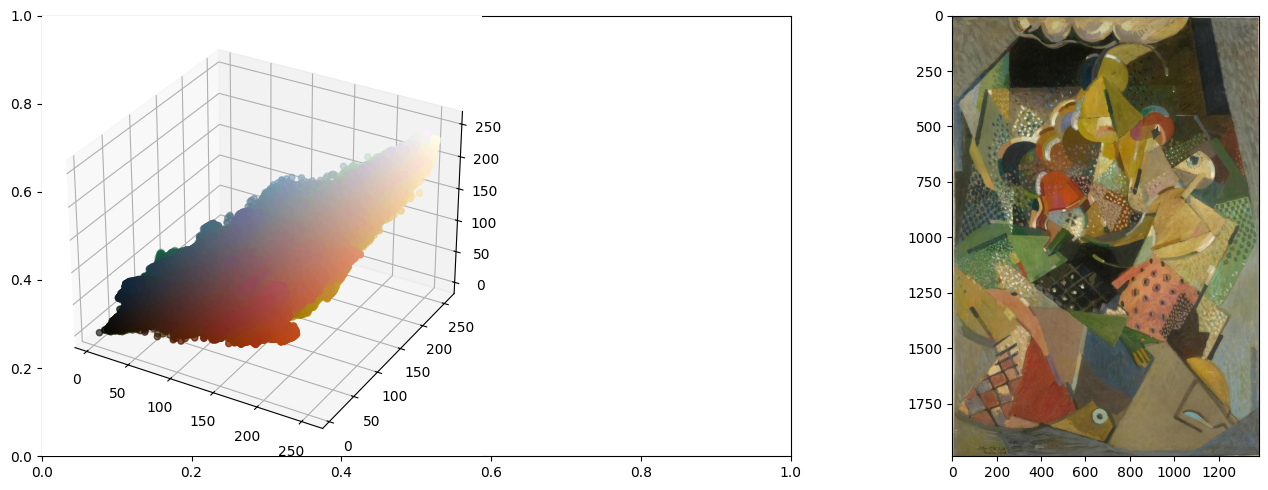

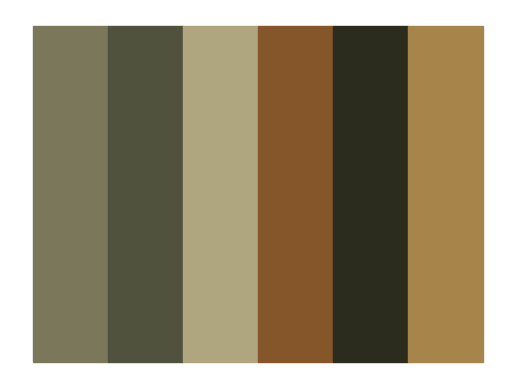

In [7]:
run_clustering(path='images/albert-gleizes_acrobats-1916.jpg')

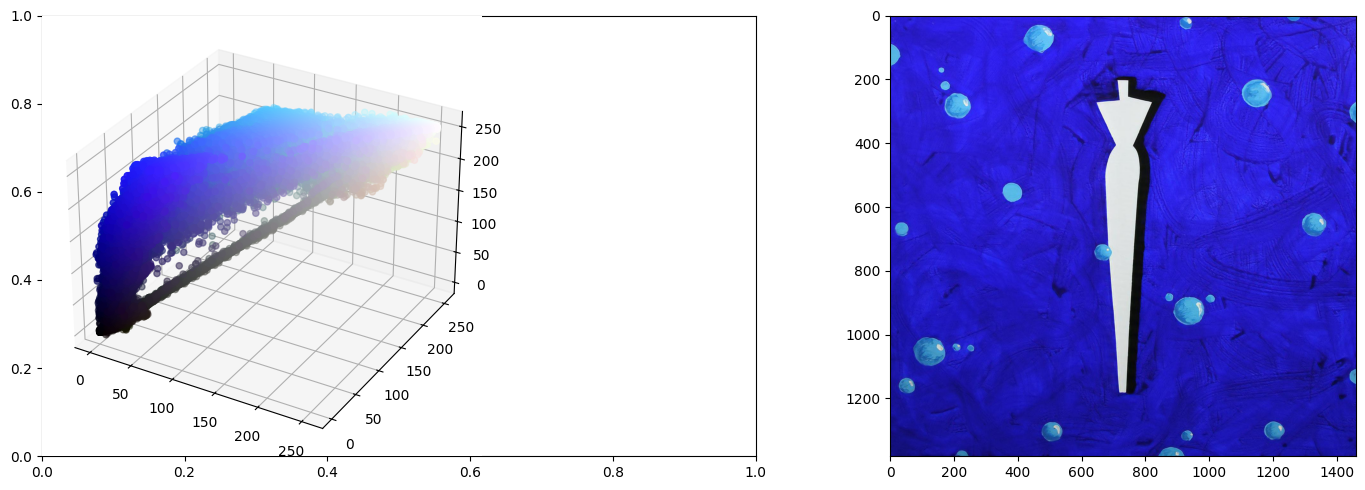

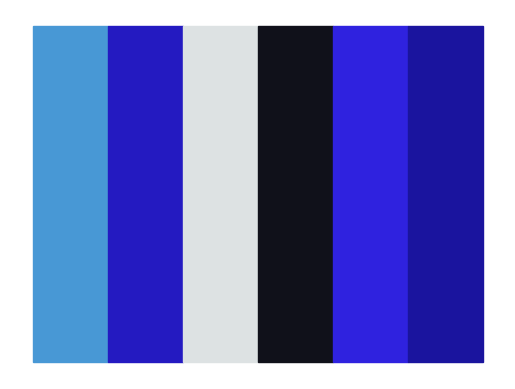

In [10]:
run_clustering(path='images/aki-kuroda_cosmogarden-2011.jpg')

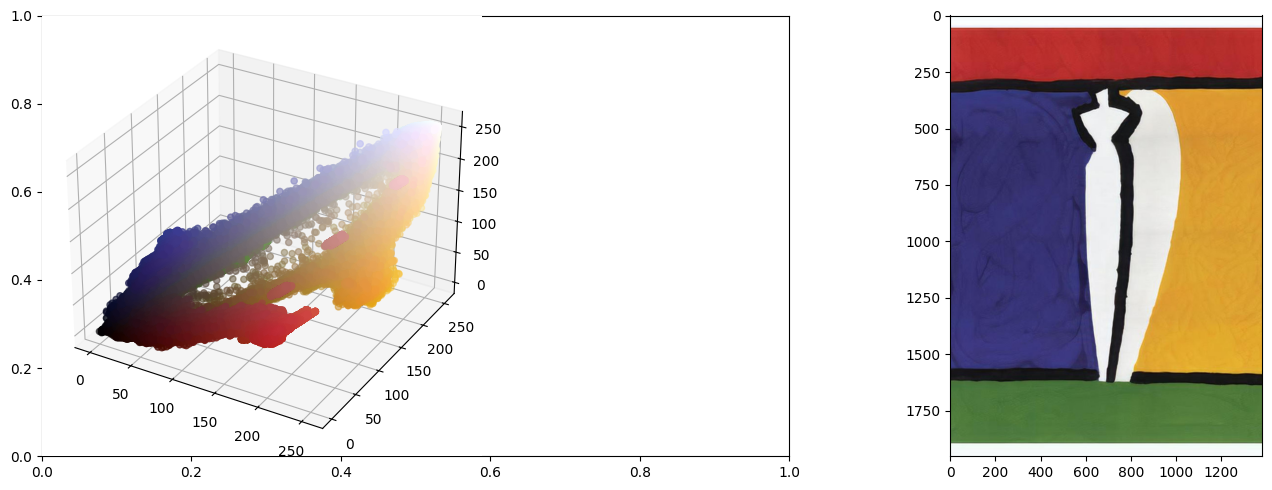

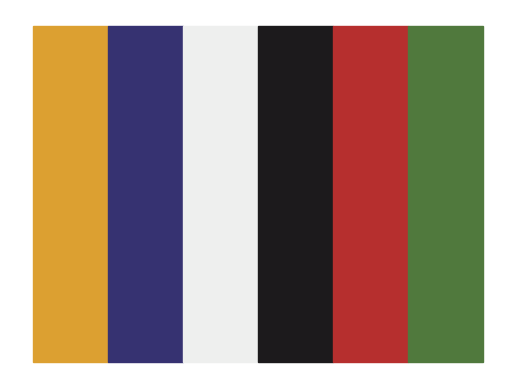

In [11]:
run_clustering(path='images/aki-kuroda_untitled-1995.jpg')

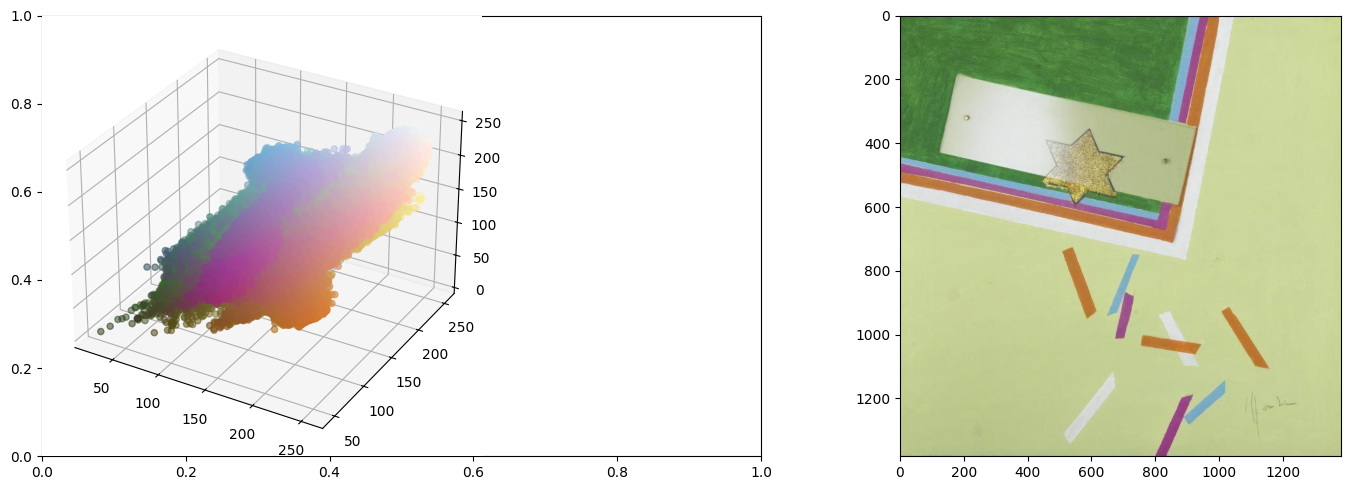

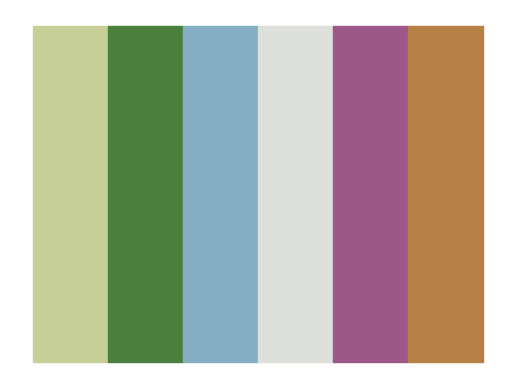

In [12]:
run_clustering(path='images/aldo-mondino_caduta-di-stella-1968.jpg')